Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Job

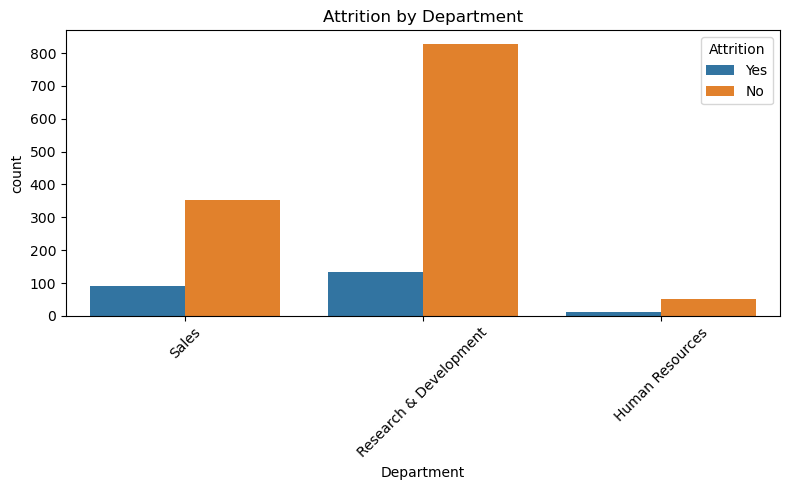

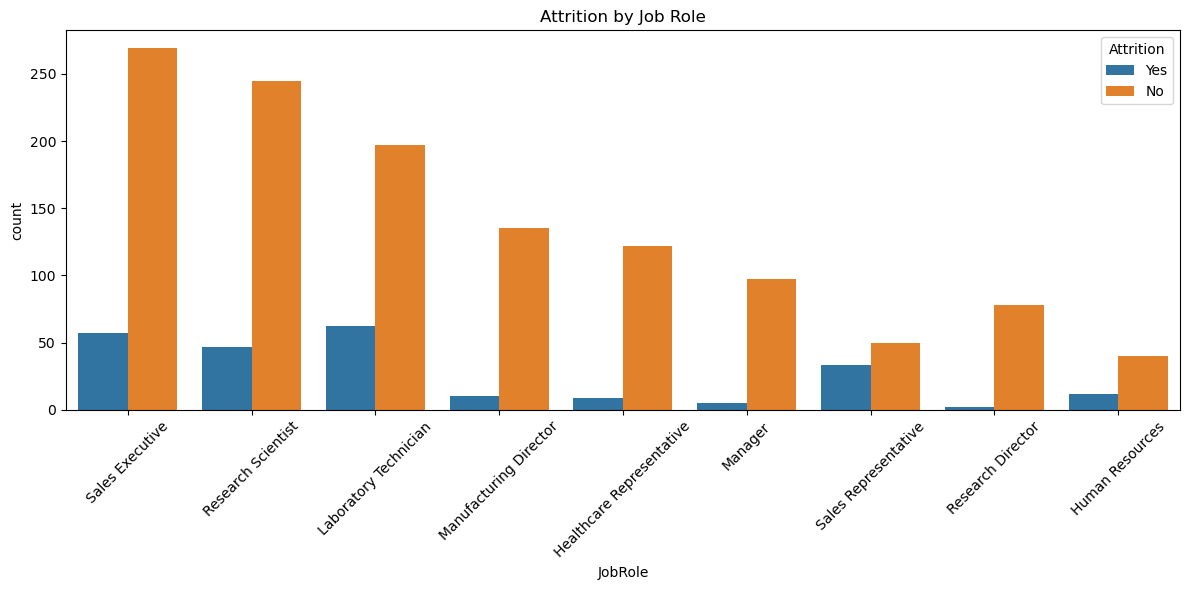

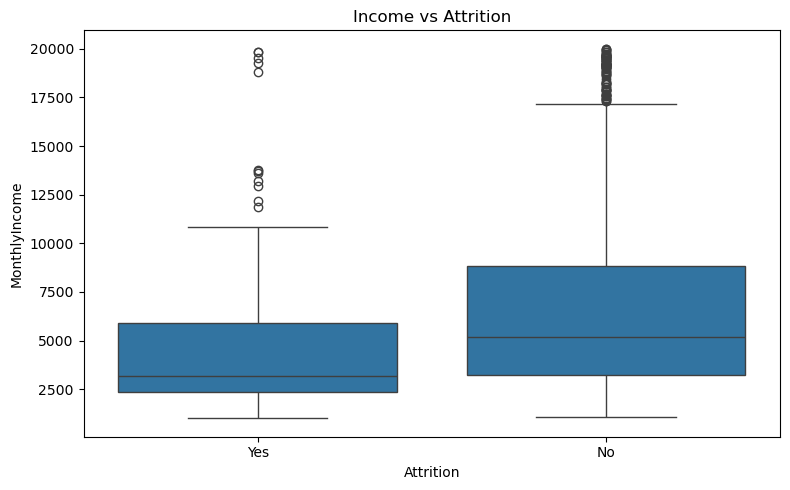

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:/Users/RAMCHARAN/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Basic info
print("Dataset Information:")
print(df.info())
print("\nAttrition Value Counts (in %):")
print(df['Attrition'].value_counts(normalize=True) * 100)

# Attrition by Department
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Attrition by JobRole
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly income distribution by attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Income vs Attrition")
plt.tight_layout()
plt.show()



Confusion Matrix:
[[253   2]
 [ 38   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.33      0.03      0.05        39

    accuracy                           0.86       294
   macro avg       0.60      0.51      0.49       294
weighted avg       0.80      0.86      0.81       294



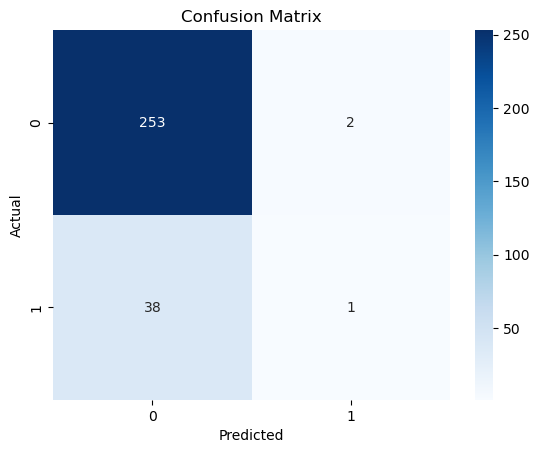

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/RAMCHARAN/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select relevant features (feel free to expand)
features = ['Age', 'MonthlyIncome', 'OverTime', 'JobSatisfaction', 'YearsAtCompany']
df_model = df[features + ['Attrition']]

# One-hot encode OverTime (binary yes/no)
df_model = pd.get_dummies(df_model, columns=['OverTime'], drop_first=True)

# Split into X (features) and y (target)
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Confusion Matrix (Decision Tree):
[[247   8]
 [ 37   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.20      0.05      0.08        39

    accuracy                           0.85       294
   macro avg       0.53      0.51      0.50       294
weighted avg       0.78      0.85      0.81       294



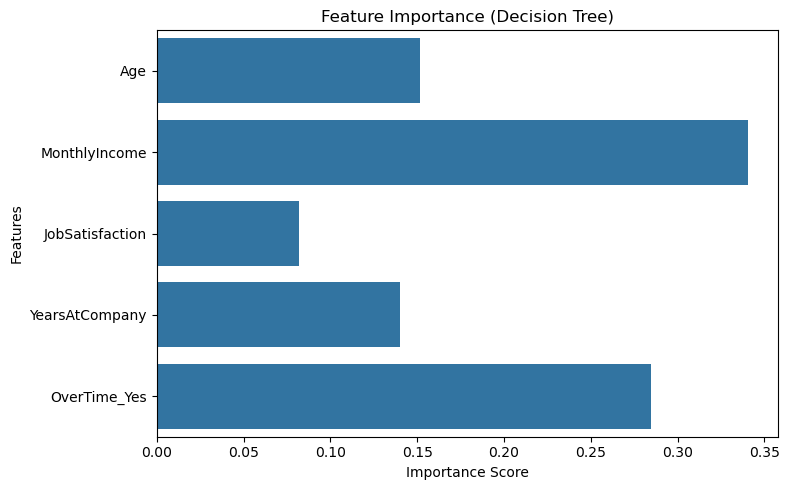

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/RAMCHARAN/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Encode target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select features
features = ['Age', 'MonthlyIncome', 'OverTime', 'JobSatisfaction', 'YearsAtCompany']
df_model = df[features + ['Attrition']]

# One-hot encode OverTime
df_model = pd.get_dummies(df_model, columns=['OverTime'], drop_first=True)

# Split features and target
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

# Feature Importance Plot
importances = tree_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [5]:
df.to_csv("hr_cleaned_data.csv", index=False)
